In [1]:
import json
with open('products.json') as f:
    data1 = json.load(f)
with open('productshandm.json') as f:
    data2 = json.load(f)


In [2]:
unique_types = ['Backpacks',
 'Belts',
 'Bra',
 'Caps-hats',
 'CasualShoes',
 'Dresses',
 'Earrings',
 'Handbags',
 'Heels',
 'Leggings',
 'Outwear',
 'pijamas',
 'Ring',
 'Sandals',
 'Scarves',
 'Shirts',
 'Shorts',
 'Skirts',
 'Sportswear',
 'Sunglasses',
 'Sweatshirts',
 'Tops',
 'Trousers',
 'Tshirts']


In [3]:
import requests
import os
data1[0]
unique_types = [
    folder for folder in os.listdir(r'C:\Users\mrpal\OneDrive\Desktop\fashcam-final\finalDataset')]


FileNotFoundError: [WinError 3] Das System kann den angegebenen Pfad nicht finden: 'C:\\Users\\mrpal\\OneDrive\\Desktop\\fashcam-final\\finalDataset'

In [ ]:
unique_types


In [ ]:
import requests
import os
# get image urls
# from tensorflow.keras.utils import load_img, img_to_array
# image_urls = []
# for i in data1:
#     for j in i['products']:

#         image_urls.append(j['imageUrl'])


# #add an  http: // to the beginning of each url
# image_urls = [r'http://' + i for i in image_urls]
# # Make a directory to store the images
# os.makedirs("images", exist_ok=True)

# # Define a list of image URLs


# # Loop through the list of URLs and download each image
# for i, url in enumerate(image_urls):
#     response = requests.get(url)
#     open(f"images/image{i}.jpg", "wb").write(response.content)


In [ ]:
# import requests
# import os
# from PIL import Image
# # import io
# import io


# # Directory to save the images
# save_dir = "imagesFromAsos"

# if not os.path.exists(save_dir):
#     os.makedirs(save_dir)

# # Loop over the image URLs
# for url in image_urls:
#     response = requests.get(url)
#     binary_image = response.content

#     # Convert binary image data to a PIL Image object
#     image = Image.open(io.BytesIO(binary_image))

    


In [ ]:
# import final model and classify the images
from keras.models import load_model
# from keras.models import load_model, model_from_json
# json_file = open('final_model.json', 'r')
# loaded_model_json = json_file.read()
# json_file.close()
# model = model_from_json(loaded_model_json)
model = load_model("final_model_v3.h5")
# load weights into new model
# model.load_weights("final_model.h5")






In [ ]:
# classify the images and save the label and the image name in a dataframe
import pandas as pd
import numpy as np
import os
# get the image names
image_names = os.listdir('asos/only')


In [ ]:
image_names


['image0.jpg',
 'image1.jpg',
 'image10.jpg',
 'image100.jpg',
 'image1000.jpg',
 'image10000.jpg',
 'image10001.jpg',
 'image10002.jpg',
 'image10003.jpg',
 'image10004.jpg',
 'image10005.jpg',
 'image10006.jpg',
 'image10007.jpg',
 'image10008.jpg',
 'image10009.jpg',
 'image1001.jpg',
 'image10010.jpg',
 'image10011.jpg',
 'image10012.jpg',
 'image10013.jpg',
 'image10014.jpg',
 'image10015.jpg',
 'image10016.jpg',
 'image10017.jpg',
 'image10018.jpg',
 'image10019.jpg',
 'image1002.jpg',
 'image10020.jpg',
 'image10021.jpg',
 'image10022.jpg',
 'image10023.jpg',
 'image10024.jpg',
 'image10025.jpg',
 'image10026.jpg',
 'image10027.jpg',
 'image10028.jpg',
 'image10029.jpg',
 'image1003.jpg',
 'image10030.jpg',
 'image10031.jpg',
 'image10032.jpg',
 'image10033.jpg',
 'image10034.jpg',
 'image10035.jpg',
 'image10036.jpg',
 'image10037.jpg',
 'image10038.jpg',
 'image10039.jpg',
 'image1004.jpg',
 'image10040.jpg',
 'image10041.jpg',
 'image10042.jpg',
 'image10043.jpg',
 'image1004

In [ ]:
from tensorflow.keras.utils import load_img, img_to_array
from PIL import Image
import tensorflow as tf
from PIL import Image, ImageOps
import numpy as np

import pandas as pd
from keras.models import Model


import cv2
from keras.models import load_model, model_from_json

def import_and_predict(image_data, model):
    size = (224, 224)
    image = Image.open(image_data)
    image = ImageOps.fit(image, size, Image.LANCZOS)
    image = np.asarray(image)   
    # img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    img_reshape = img[np.newaxis, ...]
    img_reshape = img_reshape[..., np.newaxis]
    prediction = model.predict(img_reshape)
    # get how many precents of each class
    softmax = np.exp(prediction) / np.sum(np.exp(prediction), axis=-1, keepdims=True)

    
    
    return prediction, round(softmax[0][0] , 2)


In [ ]:

# predict the labels
labels = []
score = []
image_names = os.listdir('asos/only/')
for i in image_names[:30]:
    
   import_and_predict('asos/only/' + i, model)[0]
   labels.append(unique_types[np.argmax(
       import_and_predict('asos/only/' + i, model)[0])])
   score.append(import_and_predict('asos/only/' + i, model)[1])

# create a dataframe with one colum for image names and one column for labels    
df = pd.DataFrame({'image_name': image_names[:30], 'label': labels ,'probability': score})



C:\Users\mrpal\AppData\Local\Temp\ipykernel_9840\3030835110.py:20: DeprecationWarning: LANCZOS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  image = ImageOps.fit(image, size, Image.LANCZOS)


1/1 [==============================] - 1s 1s/step


In [ ]:
df

,image_name,label,probability
0,image0.jpg,Sportswear,0.04
1,image1.jpg,Sportswear,0.04
2,image10.jpg,Sportswear,0.04
3,image100.jpg,Tops,0.04
4,image1000.jpg,Trousers,0.04
5,image10000.jpg,Shorts,0.04
6,image10001.jpg,Belts,0.04
7,image10002.jpg,Dresses,0.04
8,image10003.jpg,Bra,0.04
9,image10004.jpg,Bra,0.04


In [ ]:
df['probability'][0]


0.04

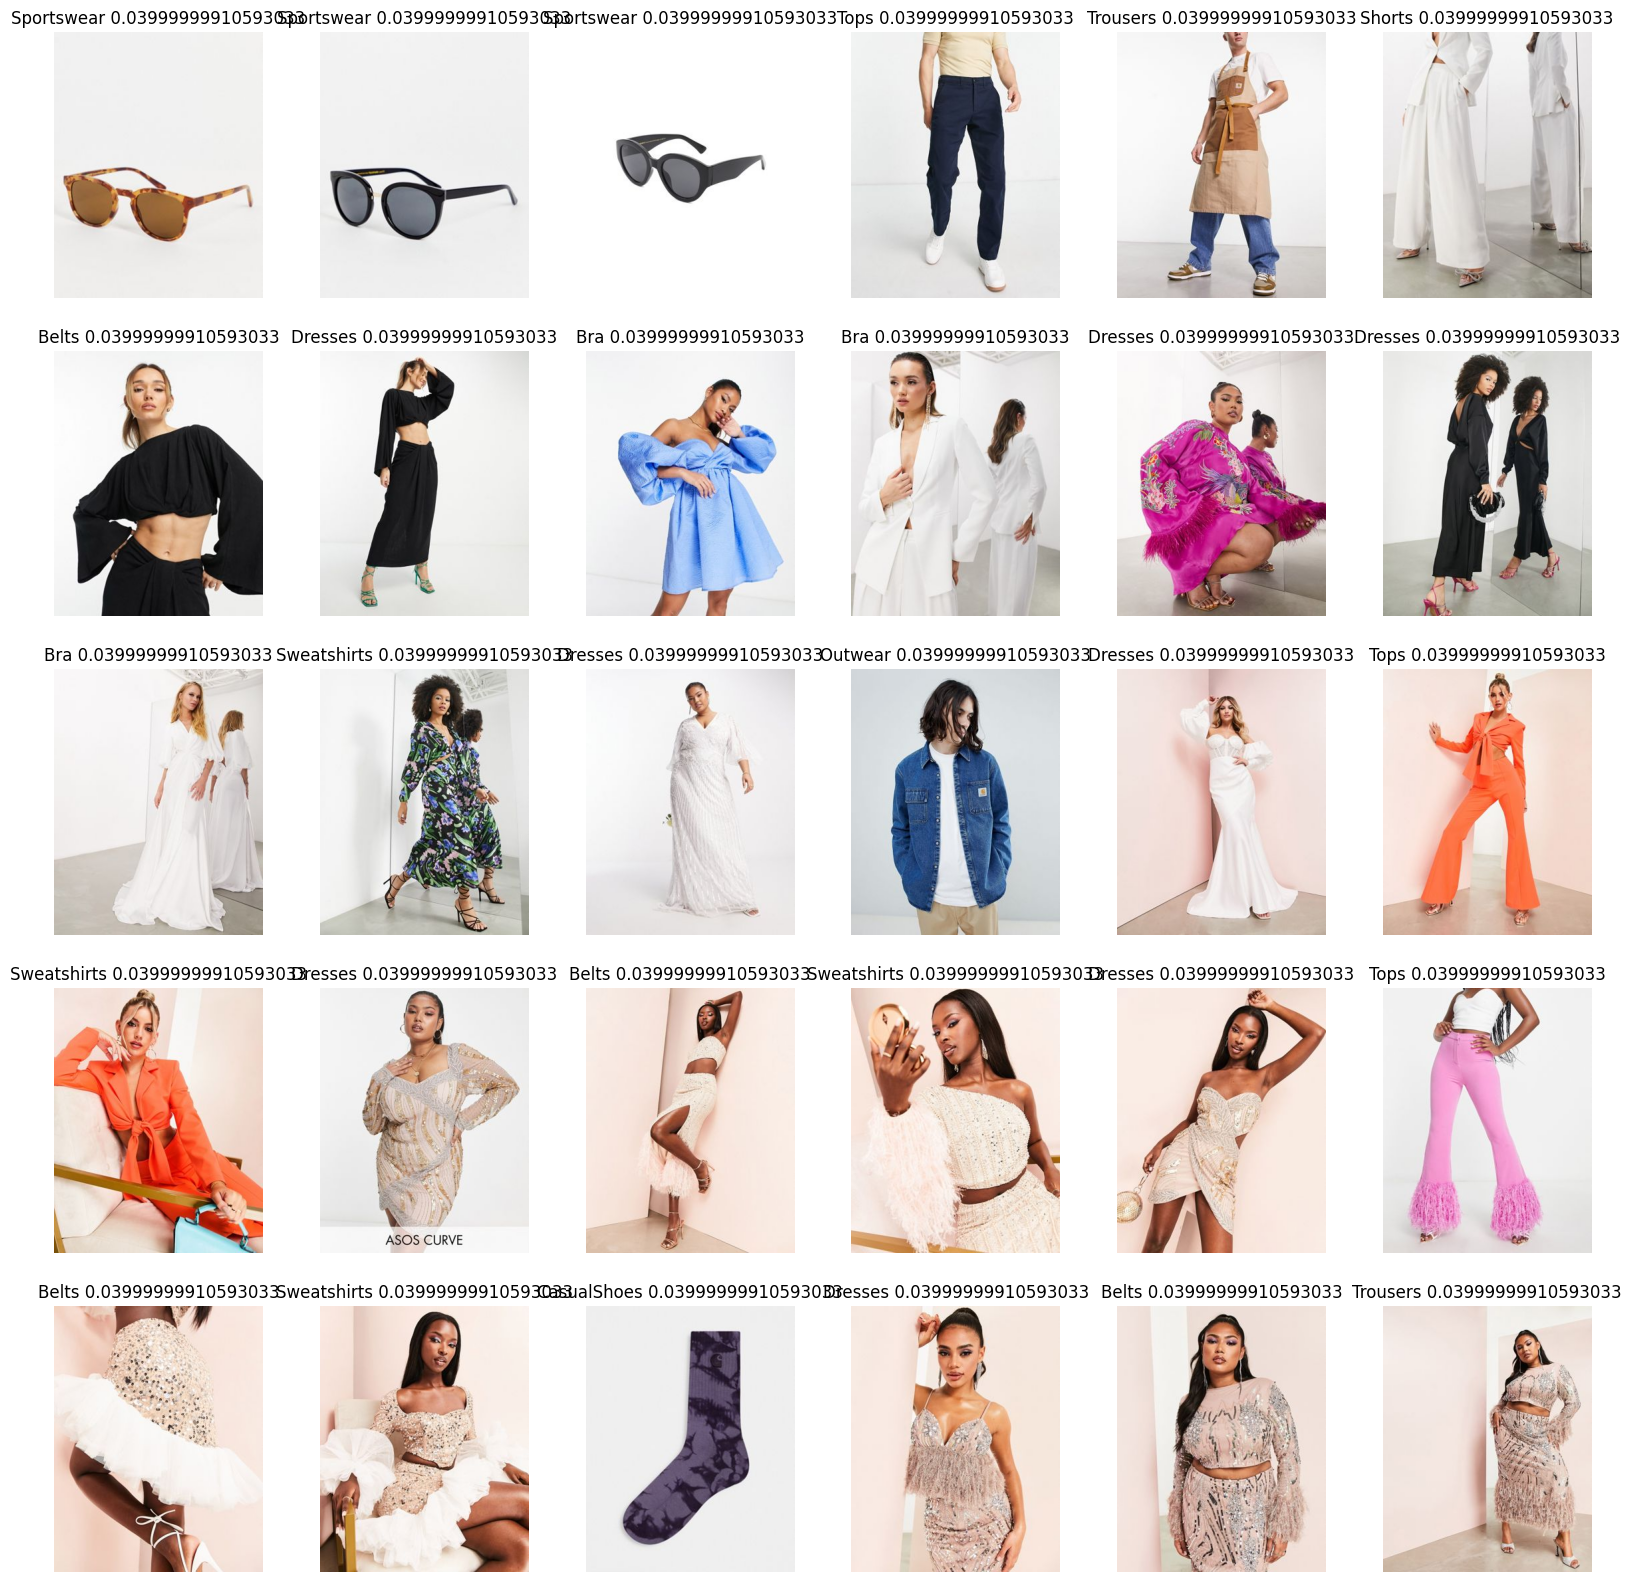

In [ ]:
# plot images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.figure(figsize=(20, 20))
for i in range(30):
    plt.subplot(5, 6, i+1)
    img = mpimg.imread('asos/only/' + df['image_name'][i])
    plt.imshow(img)
    plt.title(f"{df['label'][i]} {df['probability'][i]}")
    plt.axis('off')
plt.show()

In [ ]:
# collect the folder names form finalDataset

folder_names = os.listdir('finalDataset')


In [ ]:
folder_names
# create folders for each label in asos
for i in unique_types:
    os.makedirs("asos/" + i, exist_ok=True)
        

In [ ]:
#import shutil
#folderpath= r'C:\Users\mrpal\OneDrive\Desktop\WBS\machineLearning\supervised\deeplearning\Imagesfromfashiondataset\only'
# # for each row in the dataframe
# for index, row in selected_styles.iterrows():
#     # get the image name
#     image_name = row['image_name']
#     # get the type of clothing
#     type = row['articleType']
#     # get the source path to the image
#     src = os.path.join(r"folderpath", image_name).replace("\\", "/")

#     # get the destination path to the image
#     dst = r'Imagesfromfashiondataset/'+os.path.join(type, image_name).replace("\\", "/")
#     # move the image from the source to the destination
#     # print(src, dst)
#     shutil.move(src, dst)
